


Epoch 1/5

235/235 [==============================] - 2s 4ms/step - loss: 0.2426 - val_loss: 0.1659
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1506 - val_loss: 0.1374
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1316 - val_loss: 0.1236
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1221 - val_loss: 0.1177
Epoch 5/5
313/313 [==============================] - 0s 900us/step


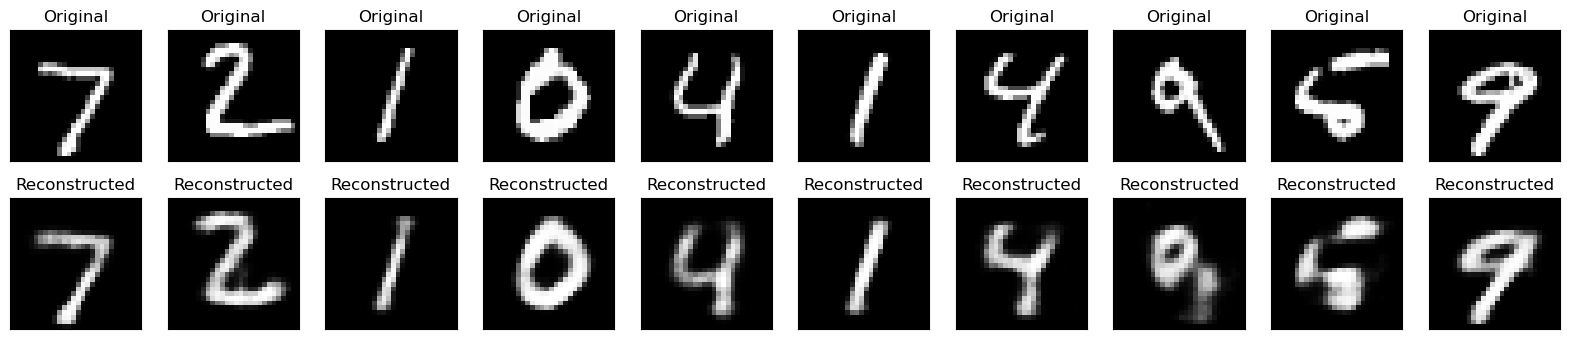

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Flatten the images for the autoencoder
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_flat, x_train_flat, epochs=5, batch_size=256, shuffle=True, 
validation_data=(x_test_flat, x_test_flat))
encoded_imgs = autoencoder.predict(x_test_flat)
encoded_imgs = encoded_imgs.reshape((len(x_test), 28, 28))
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
